### Business Problem:

With 37 predictor variables we need to assign a lead score(likelihood of a lead to convert into customer) to each lead.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',500)

In [2]:
data=pd.read_csv('Leads.csv')

In [3]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
data.shape

(9240, 37)

In [5]:
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Preparation

In [7]:
# converting yes/no to 1/0
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [8]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [9]:
#as select is also kind of blank value, so replacing select with nan
data=data.replace('Select',np.nan)

In [10]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [11]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
#dropping some variables having high missing values and are not of much importance
#'I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses' 
#these columns has only no value so it's better to drop them as they won't serve any purpose
data=data.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'],axis=1)

In [13]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
# city has high value of blank and there is not much distinct value so drop the column
data=data.drop(['City'],axis=1)

In [16]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [17]:
# this column does not seem to be of much importance from business perspective
data=data.drop(['Tags'],axis=1)

In [18]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [19]:
#replacing null value with mode
data['Country']=data['Country'].replace(np.nan,'India')

In [20]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
#replacing null value with mode
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')

In [22]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# this column has high null values and there is not much distinct value so drop the column
data=data.drop(['What matters most to you in choosing a course'],axis=1)

In [24]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [25]:
# replacing null values with others
data['Specialization']=data['Specialization'].replace(np.nan,'Others')

In [26]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Magazine                                  0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy o

In [27]:
# Removing NaN TotalVisits rows
data = data[~np.isnan(data['TotalVisits'])]

In [28]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [29]:
data['Lead Source']=data['Lead Source'].replace(np.nan,'Google')

In [30]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Inter

#### Dummy variable creation

In [31]:
data.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Country Specialization What is your current occupation  Search  Magazine  \
0   India         Others                      Unemployed       0         0   
1   India         Others                      Unemployed       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened

In [32]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
dum1 = pd.get_dummies(data['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum1],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
dum2 = pd.get_dummies(data['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum2],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
dum3 = pd.get_dummies(data['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum3],axis=1)

# Creating a dummy variable for the variable 'Country' and dropping the first one.
dum4 = pd.get_dummies(data['Country'],prefix='Country',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum4],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
dum5 = pd.get_dummies(data['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum5],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
dum6 = pd.get_dummies(data['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum6],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
dum7 = pd.get_dummies(data['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dum7],axis=1)

In [33]:
# We have created dummies for the below variables, so we can drop them
data=data.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Last Notable Activity'],axis=1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Columns: 130 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(13), object(1), uint8(114)
memory usage: 2.2+ MB


In [35]:
data.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                        

In [36]:
data.shape

(9103, 130)

In [37]:
data_check=data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
data_check.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9103.000000                  9103.000000           9103.000000
mean      3.445238                   481.350104              2.362820
std       4.854853                   545.066142              2.161418
min       0.000000                     0.000000              0.000000
25%       1.000000                     9.000000              1.000000
50%       3.000000                   244.000000              2.000000
75%       5.000000                   919.500000              3.000000
90%       7.000000                  1372.000000              5.000000
95%      10.000000                  1556.900000              6.000000
99%      17.000000                  1838.960000              9.000000
max     251.000000                  2272.000000             55.000000

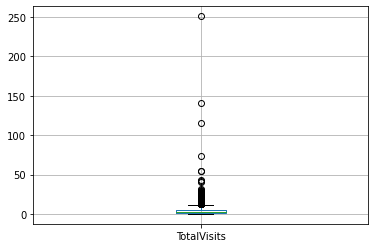

In [38]:
data.boxplot('TotalVisits')
plt.show()

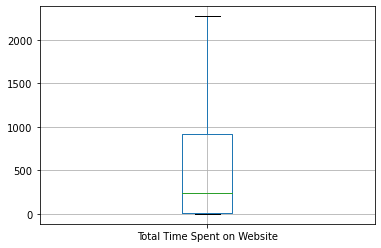

In [39]:
data.boxplot('Total Time Spent on Website')
plt.show()

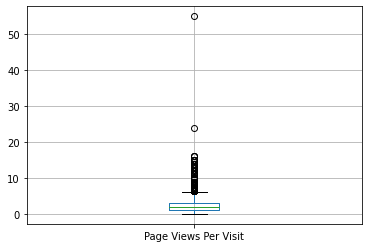

In [40]:
data.boxplot('Page Views Per Visit')
plt.show()

In [41]:
#there are outliers in totalvsits and page views per visit so need to remove them
q1=data['TotalVisits'].quantile(0.25)
q3=data['TotalVisits'].quantile(0.75)
iqr=q3-q1

In [42]:
data=data[~((data['TotalVisits']<(q1-5*iqr))|(data['TotalVisits']>(q3+5*iqr)))]
data.shape

(9081, 130)

In [43]:
q1=data['Page Views Per Visit'].quantile(0.25)
q3=data['Page Views Per Visit'].quantile(0.75)
iqr=q3-q1
data=data[~((data['Page Views Per Visit']<(q1-5*iqr))|(data['Page Views Per Visit']>(q3+5*iqr)))]
data.shape

(9064, 130)

In [44]:
data_check=data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
data_check.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9064.000000                  9064.000000           9064.000000
mean      3.301523                   480.615843              2.326041
std       3.267894                   544.873226              2.002661
min       0.000000                     0.000000              0.000000
25%       1.000000                     8.000000              1.000000
50%       3.000000                   243.000000              2.000000
75%       5.000000                   918.000000              3.000000
90%       7.000000                  1372.000000              5.000000
95%       9.000000                  1555.700000              6.000000
99%      16.000000                  1839.000000              9.000000
max      25.000000                  2272.000000             13.000000

In [45]:
data.describe()

Lead Number  Do Not Email  Do Not Call    Converted  TotalVisits  \
count    9064.000000   9064.000000  9064.000000  9064.000000  9064.000000   
mean   617049.616505      0.078663     0.000221     0.380296     3.301523   
std     23339.578327      0.269227     0.014854     0.485486     3.267894   
min    579533.000000      0.000000     0.000000     0.000000     0.000000   
25%    596415.000000      0.000000     0.000000     0.000000     1.000000   
50%    615329.500000      0.000000     0.000000     0.000000     3.000000   
75%    637173.500000      0.000000     0.000000     1.000000     5.000000   
max    660737.000000      1.000000     1.000000     1.000000    25.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9064.000000           9064.000000  9064.000000   
mean                    480.615843              2.326041     0.001545   
std                     544.873226              2.002661     0.039273   
min                       0.000000              0.000000     0.000000   
25%                       8.000000              1.000000     0.000000   
50%                     243.000000              2.000000     0.000000   
75%                     918.000000              3.000000     0.000000   
max                    2272.000000             13.000000     1.000000   

       Magazine  Newspaper Article  X Education Forums    Newspaper  \
count    9064.0        9064.000000         9064.000000  9064.000000   
mean        0.0           0.000221            0.000110     0.000110   
std         0.0           0.014854            0.010504     0.010504   
min         0.0           0.000000            0.000000     0.000000   
25%         0.0           0.000000            0.000000     0.000000   
50%         0.0           0.000000            0.000000     0.000000   
75%         0.0           0.000000            0.000000     0.000000   
max         0.0           1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9064.000000              9064.000000   
mean                0.000441                 0.000772   
std                 0.021004                 0.027781   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       A free copy of Mastering The Interview  \
count                             9064.000000   
mean                                 0.316306   
std                                  0.465060   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9064.000000                9064.000000   
mean                              0.535635                   0.066968   
std                               0.498756                   0.249981   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              9064.000000                 9064.000000   
mean                  0.003420                    0.279016   
std                   0.058385                    0.448540   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000 

### Model Building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Putting feature variable to X
X = data.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead

In [48]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
2179             0            0     0.515709                    -0.664198   
3501             0            0     3.865321                     2.028662   
5031             0            0     0.211199                    -0.828577   
3457             0            0     0.211199                    -0.102724   
7418             0            0    -0.397822                    -0.618024   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
2179              1.338436       0         0                  0   
3501              0.171823       0         0                  0   
5031             -0.499105       0         0                  0   
3457             -0.163641       0         0                  0   
7418             -0.163641       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
2179                   0          0                      0   
3501                   0          0                      0   
5031                   0          0                      0   
3457                   0          0                      0   
7418                   0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
2179                        0                                       0   
3501                        0                                       0   
5031                        0                                       0   
3457                        0                                       0   
7418                        0                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2179                                    0                          0   
3501                                    1                          0   
5031                                    0                          0   
3457                                    0                          0   
7418                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
2179                        0                           0   
3501                        0                           1   
5031                        0                           0   
3457                        0                           0   
7418                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
2179                     0                   1                      0   
3501                     0                   0                      0   
5031                     0                   0                      0   
3457                     0                   1                      0   
7418                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
2179                   0                       0                           0   
3501                   0                       0                           0   
5031                   0                       0                           1   
3457                   0                       0                           0   
7418                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
2179                              0                          0   
3501                              0                          0   
5031                              0                          0   
3457                              0                          0   
7418                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
2179                      0                           0   
3501                      0                           0   
5031                      0       

In [52]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
5114             0            0     0.211199                    -0.673433   
689              0            0    -0.397822                    -0.534912   
4087             0            0     1.124729                     0.898326   
740              0            0    -0.093311                    -0.625412   
5224             0            0    -0.702332                    -0.464727   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
5114              0.837743       0         0                  0   
689              -0.163641       0         0                  0   
4087              0.587397       0         0                  0   
740               0.337051       0         0                  0   
5224             -0.664334       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
5114                   0          0                      0   
689                    0          0                      0   
4087                   0          0                      0   
740                    0          0                      0   
5224                   0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
5114                        0                                       0   
689                         0                                       0   
4087                        0                                       0   
740                         0                                       0   
5224                        0                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5114                                    1                          0   
689                                     0                          0   
4087                                    1                          0   
740                                     1                          0   
5224                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
5114                        0                           0   
689                         0                           0   
4087                        0                           0   
740                         0                           0   
5224                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
5114                     0                   1                      0   
689                      0                   1                      0   
4087                     0                   1                      0   
740                      0                   1                      0   
5224                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
5114                   0                       0                           0   
689                    0                       0                           0   
4087                   0                       0                           0   
740                    0                       0                           0   
5224                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
5114                              0                          0   
689                               0                          0   
4087                              0                          0   
740                               0                          0   
5224                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
5114                      0                           0   
689                       0                           0   
4087                      0       

In [53]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

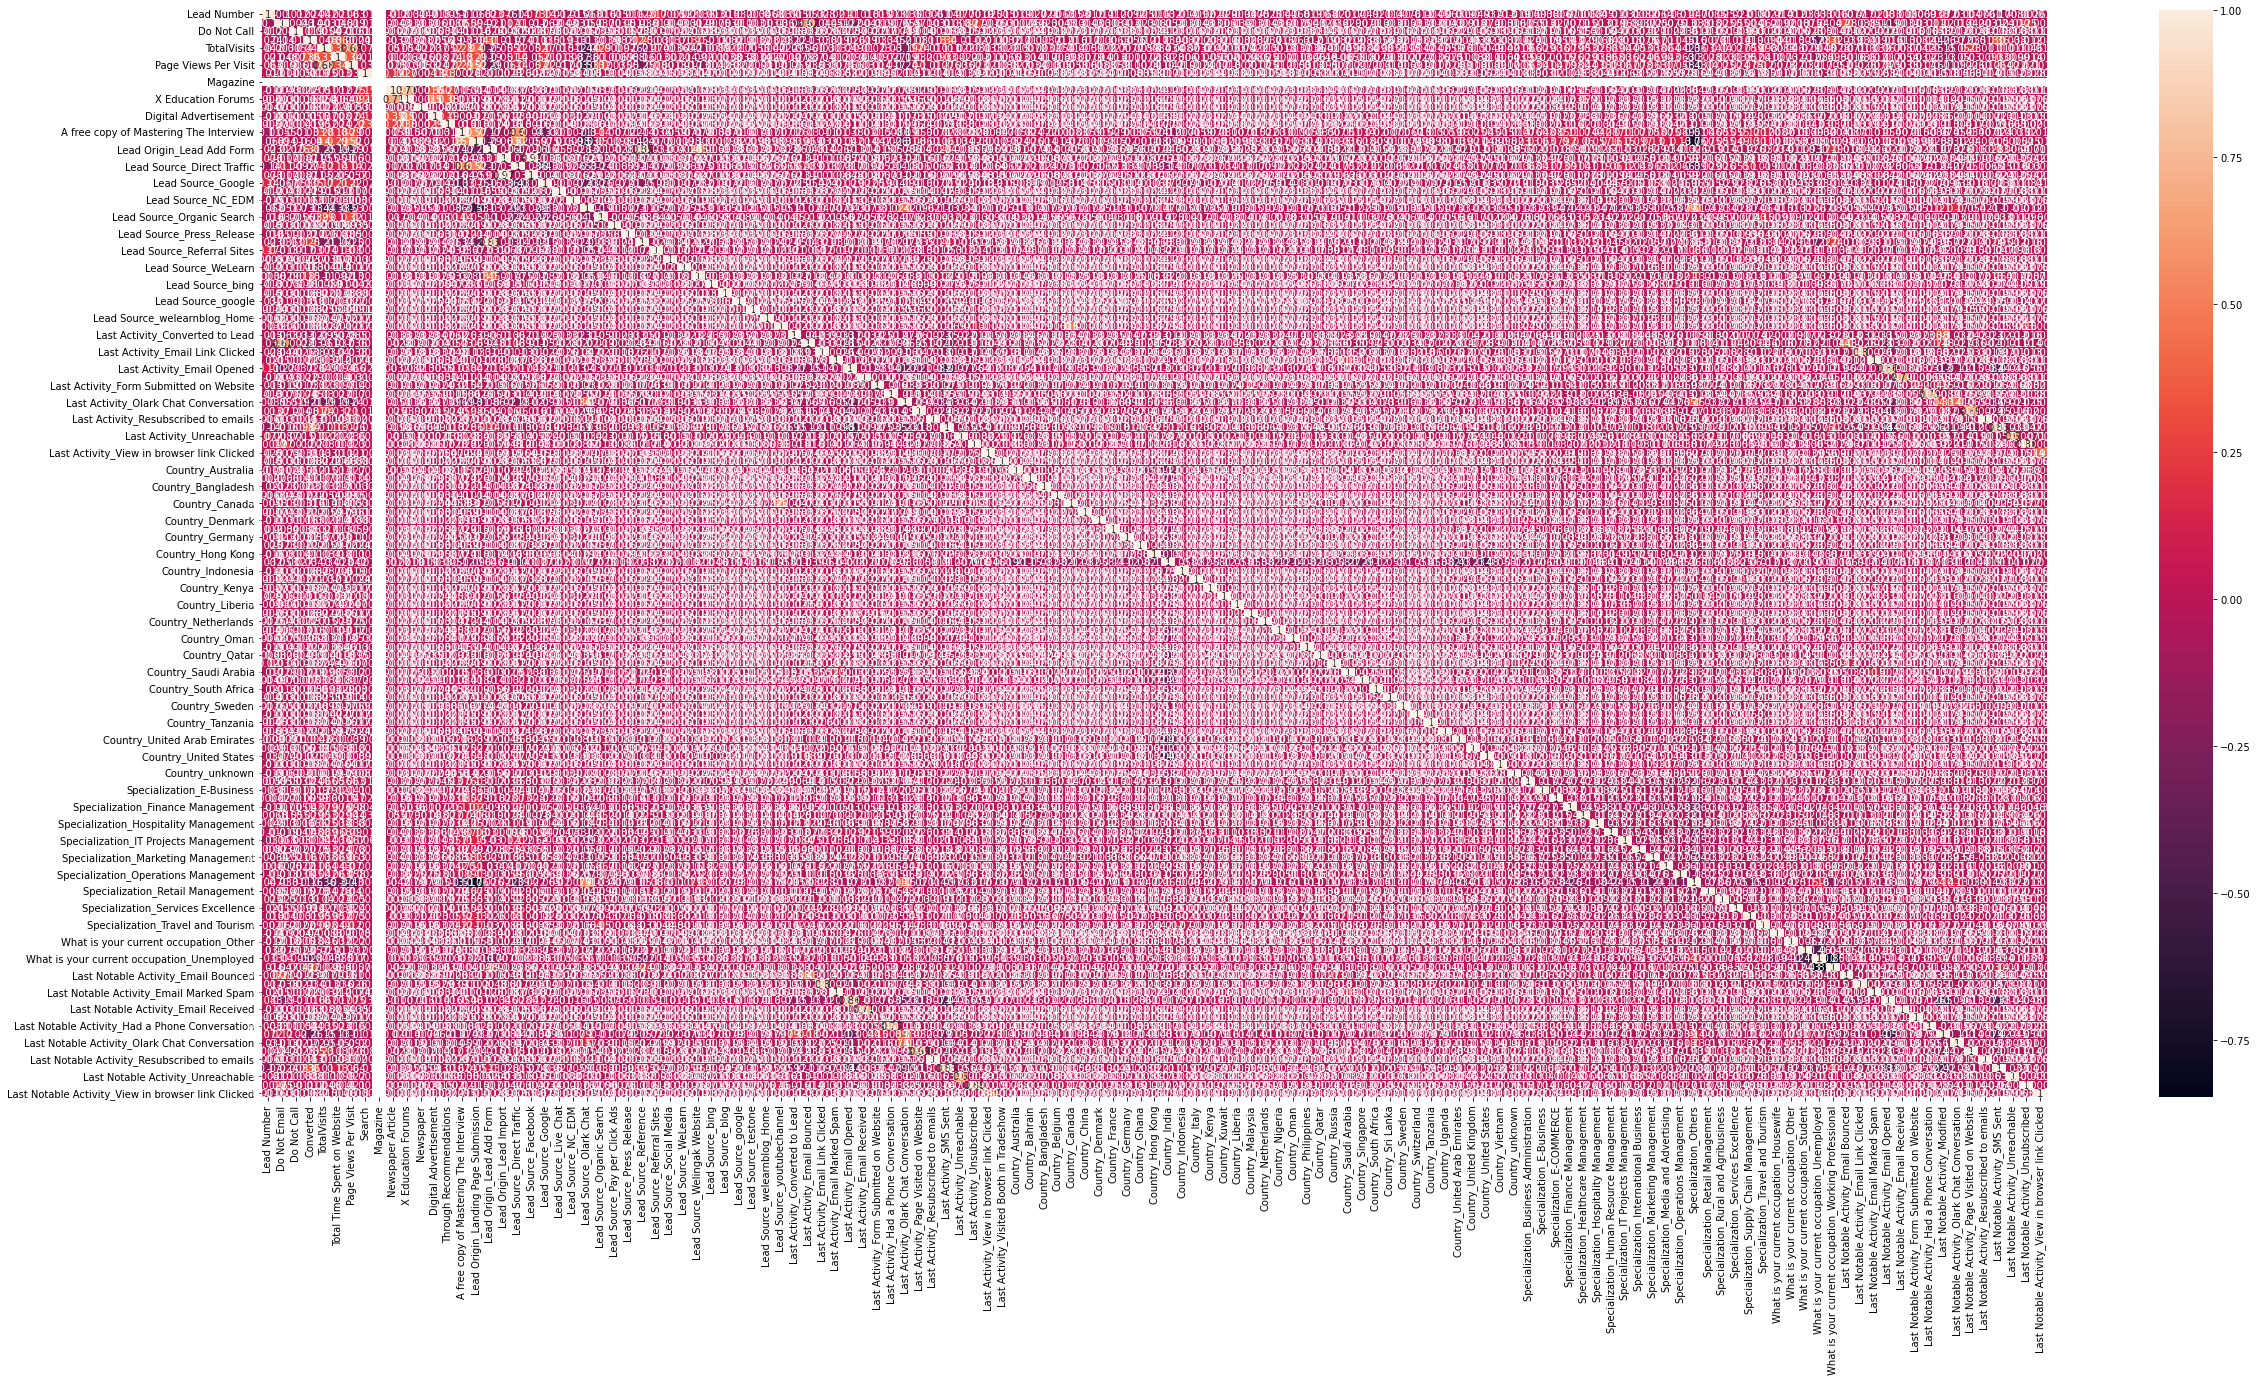

In [54]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))        
sns.heatmap(data.corr(),annot = True)
plt.show()

there are high number of variables so first removing some variables using rfe then wil check the correlation again

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE

In [57]:
rfe = RFE(logreg,n_features_to_select=40)

In [58]:
rfe = rfe.fit(X_train, y_train)

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [59]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False])

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 17),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Search', False, 71),
 ('Magazine', False, 83),
 ('Newspaper Article', False, 32),
 ('X Education Forums', False, 31),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 54),
 ('Through Recommendations', False, 67),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Pay per Click Ads', False, 82),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_R

In [61]:
col = X_train.columns[rfe.support_]

In [62]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       '

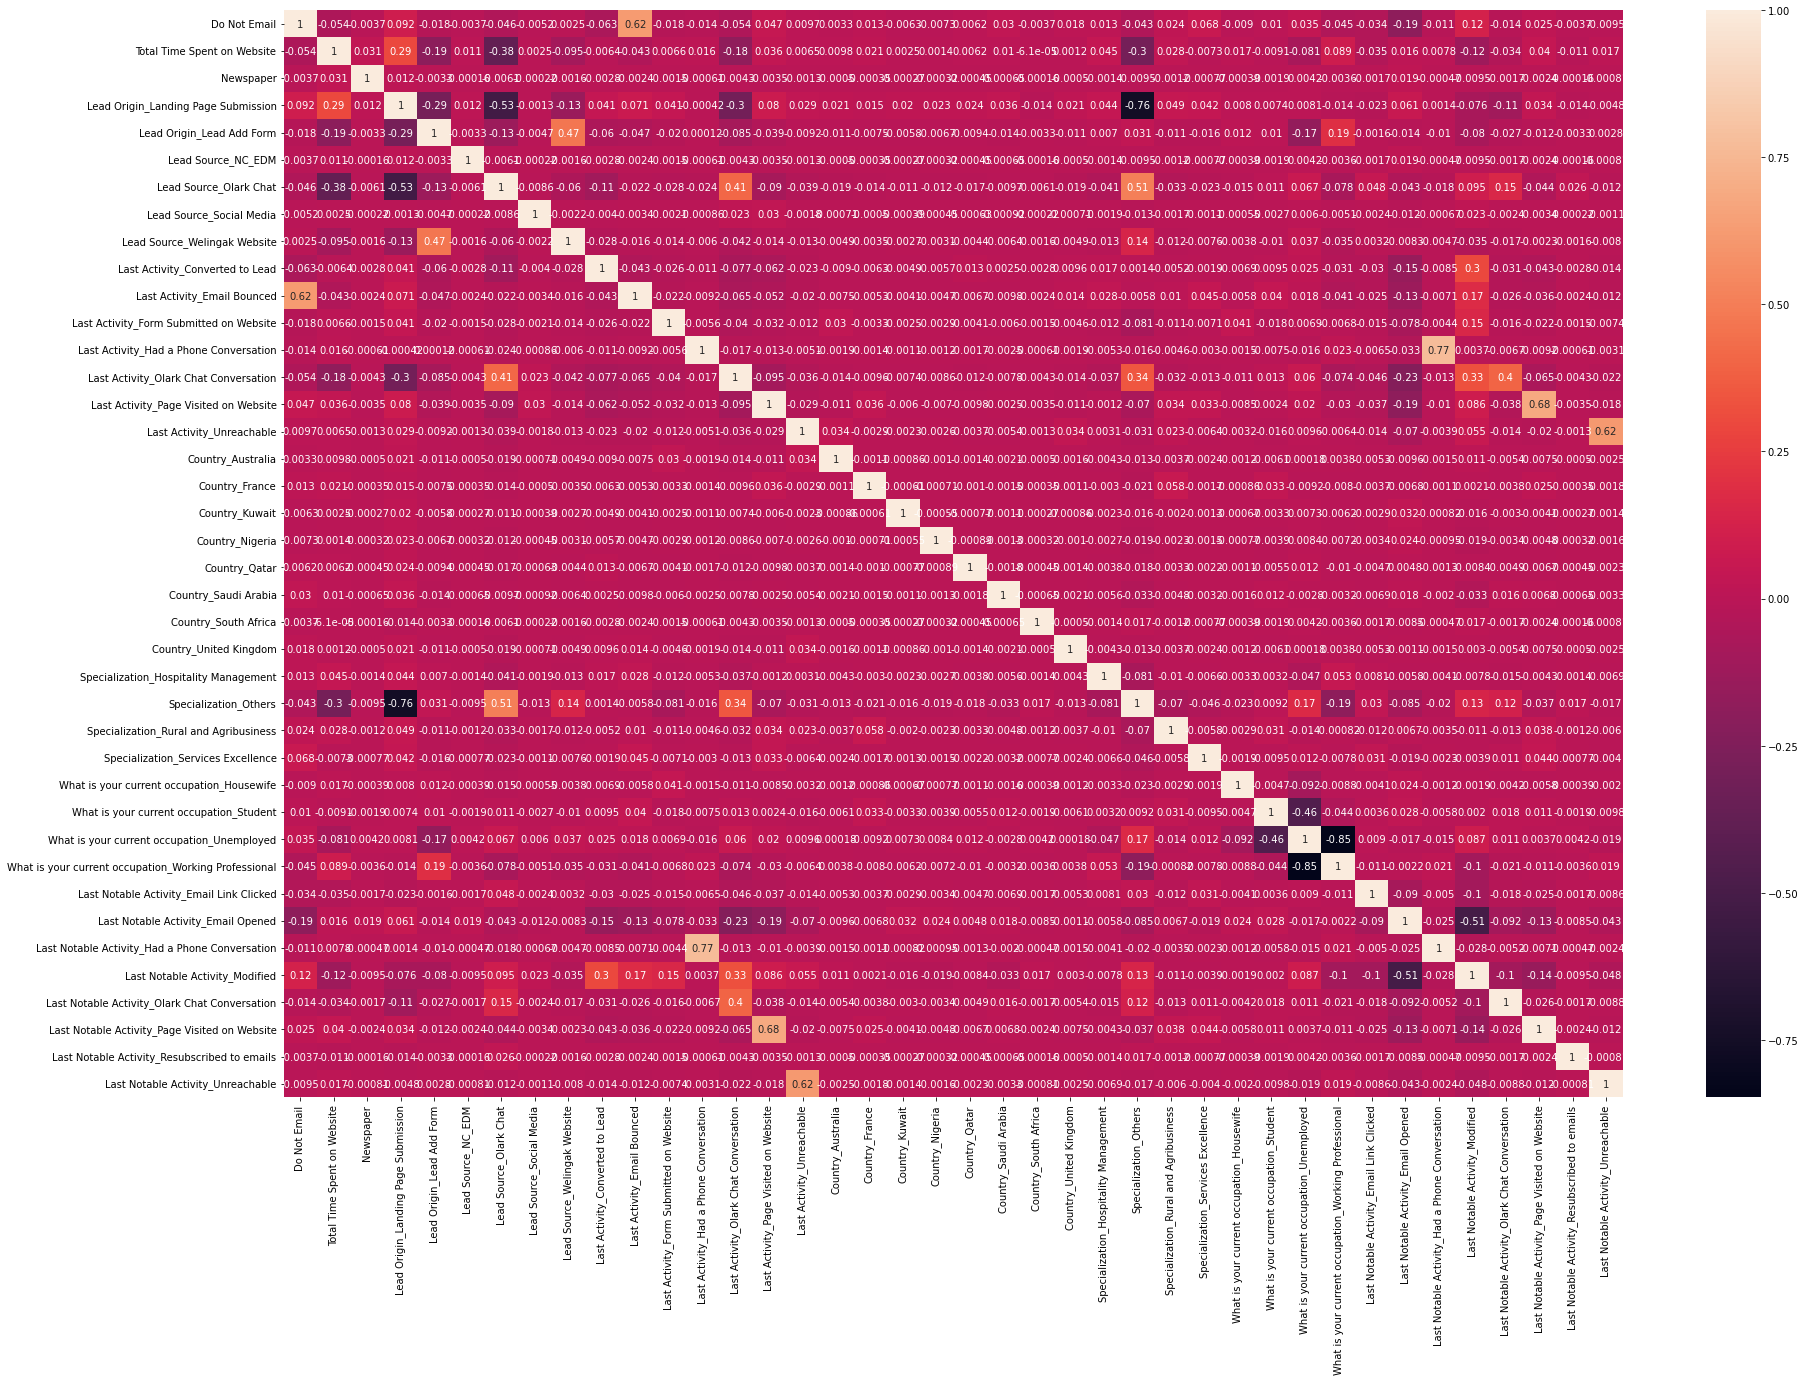

In [63]:
# Let's see the correlation matrix again
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

In [64]:
# dropping variables having high correlations
col=col.drop(['Specialization_Others','Lead Origin_Landing Page Submission','What is your current occupation_Unemployed'])

In [65]:
import statsmodels.api as sm

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.6
Date:                Wed, 22 Jun 2022   Deviance:                       5257.3
Time:                        15:26:41   Pearson chi2:                 6.40e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1393      0.070      1.985      0.047       0.002       0.277
Do Not Email                                            -1.3757      0.198     -6.946      0.000      -1.764      -0.987
Total Time Spent on Website                              1.1230      0.040     27.792      0.000       1.044       1.202
Newspaper                                              -25.1144   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                3.8372      0.221     17.386      0.000       3.405       4.270
Lead Source_NC_EDM                                      23.8451   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   1.1480      0.103     11.192      0.000       0.947       1.349
Lead Source_Social Media                                 2.3032      1.451      1.587      0.112      -0.540       5.147
Lead Source_Welingak Website                             2.7654      1.032      2.680      0.007       0.743       4.788
Last Activity_Converted to Lead                         -0.9909      0.216     -4.587      0.000      -1.414      -0.568
Last Activity_Email Bounced                             -1.3033      0.393     -3.319      0.001      -2.073      -0.534
Last Activity_Form Submitted on Website                 -0.7331      0.346     -2.122      0.034      -1.410      -0.056
Last Activity_Had a Phone Conversation                   2.0573      1.238      1.662      0.096      -0.369       4.483
Last Activity_Olark Chat Conversation                   -1.3865      0.195     -7.102      0.000      -1.769      -1.004
Last Activity_Page Visited on Website                   -0.5962      0.221     -2.695      0.007      -1.030      -0.163
Last Activity_Unreachable                               -1.4393      0.659     -2.183      0.029      -2.731      -0.147
Country_Australia                                       -1.1196      0.989     -1.132      0.257      -3.057       0.818
Country_France                                           1.0901      1.053      1.035      0.301      -0.974       3.154
Country_Kuwait                                         -23.1008   3.82e+04     -0.001      1.000   -7.49e+04    7.48e+04
Country_Nigeria                                        -23.1935   3.46e+04     -0.001      0.999   -6.78e+04    6.77e+04
Country_Qatar                                           -1.7880      1.247     -1.433      0.152      -4.233       0.657
Country_Saudi Arabia                                    -1.1292      0.735     -1.537      0.124      -2.569       0.311
Country_South Africa                                    25

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
32                     Last Notable Activity_Modified  2.61
11             Last Activity_Had a Phone Conversation  2.52
31     Last Notable Activity_Had a Phone Conversation  2.51
13              Last Activity_Page Visited on Website  2.46
34      Last Notable Activity_Page Visited on Website  2.22
12              Last Activity_Olark Chat Conversation  2.15
9                         Last Activity_Email Bounced  1.81
0                                        Do Not Email  1.78
14                          Last Activity_Unreachable  1.71
5                              Lead Source_Olark Chat  1.68
36                  Last Notable Activity_Unreachable  1.66
3                           Lead Origin_Lead Add Form  1.53
33      Last Notable Activity_Olark Chat Conversation  1.35
8                     Last Activity_Converted to Lead  1.35
7                        Lead Source_Welingak Website  1.33
1                         Total Time Spent on Website  1.25
30                 Last Notable Activity_Email Opened  1.15
28  What is your current occupation_Working Profes...  1.14
10            Last Activity_Form Submitted on Website  1.09
27            What is your current occupation_Student  1.03
23              Specialization_Hospitality Management  1.02
29           Last Notable Activity_Email Link Clicked  1.02
24              Specialization_Rural and Agribusiness  1.02
25                 Specialization_Services Excellence  1.01
20                               Country_Saudi Arabia  1.01
16                                     Country_France  1.01
15                                  Country_Australia  1.01
22                             Country_United Kingdom  1.00
21                               Country_South Africa  1.00
26          What is your current occupation_Housewife  1.00
19                                      Country_Qatar  1.00
17                                     Country_Kuwait  1.00
4                                  Lead Source_NC_EDM  1.00
6                            Lead Source_Social Media  1.00
2                                           Newspaper  1.00
35       Last Notable Activity_Resubscribed to emails  1.00
18                                    Country_Nigeria  1.00

In [69]:
col = col.drop('Newspaper', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [70]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.4
Date:                Wed, 22 Jun 2022   Deviance:                       5260.7
Time:                        15:26:43   Pearson chi2:                 6.40e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1396      0.070      1.990      0.047       0.002       0.277
Do Not Email                                            -1.3753      0.198     -6.946      0.000      -1.763      -0.987
Total Time Spent on Website                              1.1203      0.040     27.763      0.000       1.041       1.199
Lead Origin_Lead Add Form                                3.8350      0.221     17.378      0.000       3.403       4.268
Lead Source_NC_EDM                                      23.8493   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   1.1462      0.103     11.177      0.000       0.945       1.347
Lead Source_Social Media                                 2.3026      1.451      1.587      0.112      -0.540       5.146
Lead Source_Welingak Website                             2.7653      1.032      2.680      0.007       0.743       4.787
Last Activity_Converted to Lead                         -0.9906      0.216     -4.587      0.000      -1.414      -0.567
Last Activity_Email Bounced                             -1.3028      0.393     -3.318      0.001      -2.072      -0.533
Last Activity_Form Submitted on Website                 -0.7324      0.345     -2.121      0.034      -1.409      -0.056
Last Activity_Had a Phone Conversation                   2.0568      1.237      1.662      0.096      -0.368       4.482
Last Activity_Olark Chat Conversation                   -1.3872      0.195     -7.107      0.000      -1.770      -1.005
Last Activity_Page Visited on Website                   -0.5956      0.221     -2.694      0.007      -1.029      -0.162
Last Activity_Unreachable                               -1.4393      0.659     -2.184      0.029      -2.731      -0.147
Country_Australia                                       -1.1184      0.988     -1.132      0.258      -3.056       0.819
Country_France                                           1.0899      1.053      1.036      0.300      -0.973       3.153
Country_Kuwait                                         -23.0954   3.82e+04     -0.001      1.000   -7.49e+04    7.48e+04
Country_Nigeria                                        -23.1917   3.46e+04     -0.001      0.999   -6.78e+04    6.77e+04
Country_Qatar                                           -1.7843      1.246     -1.432      0.152      -4.227       0.658
Country_Saudi Arabia                                    -1.1265      0.734     -1.534      0.125      -2.566       0.313
Country_South Africa                                    25.0387   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_United Kingdom                                   1

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
31                     Last Notable Activity_Modified  2.61
10             Last Activity_Had a Phone Conversation  2.52
30     Last Notable Activity_Had a Phone Conversation  2.51
12              Last Activity_Page Visited on Website  2.46
33      Last Notable Activity_Page Visited on Website  2.22
11              Last Activity_Olark Chat Conversation  2.15
8                         Last Activity_Email Bounced  1.81
0                                        Do Not Email  1.78
13                          Last Activity_Unreachable  1.71
4                              Lead Source_Olark Chat  1.68
35                  Last Notable Activity_Unreachable  1.66
2                           Lead Origin_Lead Add Form  1.53
32      Last Notable Activity_Olark Chat Conversation  1.35
7                     Last Activity_Converted to Lead  1.35
6                        Lead Source_Welingak Website  1.33
1                         Total Time Spent on Website  1.25
29                 Last Notable Activity_Email Opened  1.15
27  What is your current occupation_Working Profes...  1.14
9             Last Activity_Form Submitted on Website  1.09
26            What is your current occupation_Student  1.03
22              Specialization_Hospitality Management  1.02
28           Last Notable Activity_Email Link Clicked  1.02
23              Specialization_Rural and Agribusiness  1.02
24                 Specialization_Services Excellence  1.01
19                               Country_Saudi Arabia  1.01
15                                     Country_France  1.01
14                                  Country_Australia  1.01
21                             Country_United Kingdom  1.00
25          What is your current occupation_Housewife  1.00
20                               Country_South Africa  1.00
17                                    Country_Nigeria  1.00
16                                     Country_Kuwait  1.00
5                            Lead Source_Social Media  1.00
3                                  Lead Source_NC_EDM  1.00
34       Last Notable Activity_Resubscribed to emails  1.00
18                                      Country_Qatar  1.00

In [72]:
col = col.drop(['Lead Source_NC_EDM','Country_Kuwait'], 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

In [73]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.7
Date:                Wed, 22 Jun 2022   Deviance:                       5265.4
Time:                        15:26:44   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1397      0.070      1.991      0.046       0.002       0.277
Do Not Email                                            -1.3752      0.198     -6.946      0.000      -1.763      -0.987
Total Time Spent on Website                              1.1195      0.040     27.766      0.000       1.040       1.198
Lead Origin_Lead Add Form                                3.8345      0.221     17.376      0.000       3.402       4.267
Lead Source_Olark Chat                                   1.1457      0.103     11.175      0.000       0.945       1.347
Lead Source_Social Media                                 2.3024      1.450      1.587      0.112      -0.540       5.145
Lead Source_Welingak Website                             2.7652      1.032      2.680      0.007       0.743       4.787
Last Activity_Converted to Lead                         -0.9904      0.216     -4.587      0.000      -1.414      -0.567
Last Activity_Email Bounced                             -1.3027      0.393     -3.318      0.001      -2.072      -0.533
Last Activity_Form Submitted on Website                 -0.7322      0.345     -2.120      0.034      -1.409      -0.055
Last Activity_Had a Phone Conversation                   2.0567      1.237      1.662      0.096      -0.368       4.482
Last Activity_Olark Chat Conversation                   -1.3874      0.195     -7.109      0.000      -1.770      -1.005
Last Activity_Page Visited on Website                   -0.5954      0.221     -2.693      0.007      -1.029      -0.162
Last Activity_Unreachable                               -1.4392      0.659     -2.184      0.029      -2.731      -0.147
Country_Australia                                       -1.1180      0.988     -1.131      0.258      -3.055       0.819
Country_France                                           1.0899      1.052      1.036      0.300      -0.973       3.152
Country_Nigeria                                        -22.1908    2.1e+04     -0.001      0.999   -4.11e+04    4.11e+04
Country_Qatar                                           -1.7830      1.246     -1.431      0.152      -4.225       0.659
Country_Saudi Arabia                                    -1.1255      0.734     -1.533      0.125      -2.564       0.313
Country_South Africa                                    24.0384   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Country_United Kingdom                                   1.1205      0.908      1.234      0.217      -0.660       2.901
Specialization_Hospitality Management                   -0.4177      0.329     -1.270      0.204      -1.062       0.227
Specialization_Rural and Agribusiness                    0

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
29                     Last Notable Activity_Modified  2.61
9              Last Activity_Had a Phone Conversation  2.52
28     Last Notable Activity_Had a Phone Conversation  2.51
11              Last Activity_Page Visited on Website  2.46
31      Last Notable Activity_Page Visited on Website  2.22
10              Last Activity_Olark Chat Conversation  2.15
7                         Last Activity_Email Bounced  1.81
0                                        Do Not Email  1.78
12                          Last Activity_Unreachable  1.71
3                              Lead Source_Olark Chat  1.67
33                  Last Notable Activity_Unreachable  1.66
2                           Lead Origin_Lead Add Form  1.53
30      Last Notable Activity_Olark Chat Conversation  1.35
6                     Last Activity_Converted to Lead  1.35
5                        Lead Source_Welingak Website  1.33
1                         Total Time Spent on Website  1.25
27                 Last Notable Activity_Email Opened  1.14
25  What is your current occupation_Working Profes...  1.14
8             Last Activity_Form Submitted on Website  1.09
24            What is your current occupation_Student  1.03
26           Last Notable Activity_Email Link Clicked  1.02
20              Specialization_Hospitality Management  1.02
21              Specialization_Rural and Agribusiness  1.02
22                 Specialization_Services Excellence  1.01
14                                     Country_France  1.01
13                                  Country_Australia  1.01
17                               Country_Saudi Arabia  1.01
23          What is your current occupation_Housewife  1.00
19                             Country_United Kingdom  1.00
18                               Country_South Africa  1.00
16                                      Country_Qatar  1.00
15                                    Country_Nigeria  1.00
4                            Lead Source_Social Media  1.00
32       Last Notable Activity_Resubscribed to emails  1.00

In [77]:
col = col.drop(['Country_South Africa','What is your current occupation_Housewife'], 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

In [78]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.2
Date:                Wed, 22 Jun 2022   Deviance:                       5280.5
Time:                        15:28:19   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1415      0.070      2.018      0.044       0.004       0.279
Do Not Email                                            -1.3771      0.198     -6.959      0.000      -1.765      -0.989
Total Time Spent on Website                              1.1181      0.040     27.783      0.000       1.039       1.197
Lead Origin_Lead Add Form                                3.8338      0.220     17.390      0.000       3.402       4.266
Lead Source_Olark Chat                                   1.1383      0.102     11.118      0.000       0.938       1.339
Lead Source_Social Media                                 2.2992      1.450      1.585      0.113      -0.544       5.142
Lead Source_Welingak Website                             2.7579      1.032      2.673      0.008       0.736       4.780
Last Activity_Converted to Lead                         -0.9985      0.216     -4.628      0.000      -1.421      -0.576
Last Activity_Email Bounced                             -1.3037      0.392     -3.323      0.001      -2.073      -0.535
Last Activity_Form Submitted on Website                 -0.6497      0.337     -1.926      0.054      -1.311       0.011
Last Activity_Had a Phone Conversation                   2.0474      1.237      1.655      0.098      -0.377       4.472
Last Activity_Olark Chat Conversation                   -1.3922      0.195     -7.137      0.000      -1.775      -1.010
Last Activity_Page Visited on Website                   -0.6032      0.221     -2.730      0.006      -1.036      -0.170
Last Activity_Unreachable                               -1.4475      0.659     -2.197      0.028      -2.739      -0.156
Country_Australia                                       -1.1235      0.987     -1.138      0.255      -3.058       0.811
Country_France                                           1.0882      1.052      1.034      0.301      -0.974       3.150
Country_Nigeria                                        -21.1943   1.27e+04     -0.002      0.999    -2.5e+04    2.49e+04
Country_Qatar                                           -1.7871      1.246     -1.434      0.151      -4.229       0.655
Country_Saudi Arabia                                    -1.1264      0.734     -1.535      0.125      -2.564       0.312
Country_United Kingdom                                   1.1143      0.908      1.227      0.220      -0.665       2.894
Specialization_Hospitality Management                   -0.4207      0.329     -1.280      0.201      -1.065       0.224
Specialization_Rural and Agribusiness                    0.6160      0.357      1.726      0.084      -0.083       1.315
Specialization_Services Excellence                      -0

In [79]:
col = col.drop(['Country_Nigeria','Last Activity_Had a Phone Conversation','Specialization_Services Excellence'], 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()

In [80]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.7
Date:                Wed, 22 Jun 2022   Deviance:                       5289.3
Time:                        15:28:20   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1360      0.070      1.942      0.052      -0.001       0.273
Do Not Email                                            -1.3917      0.197     -7.052      0.000      -1.778      -1.005
Total Time Spent on Website                              1.1187      0.040     27.829      0.000       1.040       1.198
Lead Origin_Lead Add Form                                3.8432      0.220     17.442      0.000       3.411       4.275
Lead Source_Olark Chat                                   1.1400      0.102     11.142      0.000       0.939       1.341
Lead Source_Social Media                                 2.3005      1.451      1.586      0.113      -0.543       5.144
Lead Source_Welingak Website                             2.7512      1.032      2.667      0.008       0.729       4.773
Last Activity_Converted to Lead                         -1.0139      0.216     -4.704      0.000      -1.436      -0.591
Last Activity_Email Bounced                             -1.2987      0.392     -3.315      0.001      -2.067      -0.531
Last Activity_Form Submitted on Website                 -0.6605      0.337     -1.958      0.050      -1.322       0.000
Last Activity_Olark Chat Conversation                   -1.4035      0.195     -7.202      0.000      -1.785      -1.022
Last Activity_Page Visited on Website                   -0.6153      0.221     -2.788      0.005      -1.048      -0.183
Last Activity_Unreachable                               -1.4585      0.659     -2.212      0.027      -2.750      -0.166
Country_Australia                                       -1.1201      0.987     -1.134      0.257      -3.055       0.815
Country_France                                           1.0918      1.052      1.038      0.299      -0.969       3.153
Country_Qatar                                           -1.7833      1.246     -1.431      0.152      -4.226       0.659
Country_Saudi Arabia                                    -1.1197      0.734     -1.526      0.127      -2.558       0.318
Country_United Kingdom                                   1.1164      0.907      1.230      0.219      -0.662       2.895
Specialization_Hospitality Management                   -0.4186      0.329     -1.273      0.203      -1.063       0.226
Specialization_Rural and Agribusiness                    0.6184      0.357      1.732      0.083      -0.081       1.318
What is your current occupation_Student                  0.3955      0.219      1.803      0.071      -0.035       0.825
What is your current occupation_Working Professional     2.7662      0.185     14.979      0.000       2.404       3.128
Last Notable Activity_Email Link Clicked                -1

In [81]:
col=col.drop(['Lead Source_Social Media','Country_Australia','Specialization_Hospitality Management','Last Notable Activity_Email Link Clicked'],1)
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()

In [82]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.6
Date:                Wed, 22 Jun 2022   Deviance:                       5349.2
Time:                        15:28:21   Pearson chi2:                 6.33e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0023      0.067     -0.035      0.972      -0.134       0.129
Do Not Email                                            -1.3152      0.196     -6.717      0.000      -1.699      -0.931
Total Time Spent on Website                              1.1159      0.040     27.996      0.000       1.038       1.194
Lead Origin_Lead Add Form                                3.8107      0.219     17.382      0.000       3.381       4.240
Lead Source_Olark Chat                                   1.0821      0.101     10.705      0.000       0.884       1.280
Lead Source_Welingak Website                             2.7616      1.031      2.678      0.007       0.741       4.783
Last Activity_Converted to Lead                         -1.0207      0.215     -4.740      0.000      -1.443      -0.599
Last Activity_Email Bounced                             -1.2938      0.389     -3.323      0.001      -2.057      -0.531
Last Activity_Form Submitted on Website                 -0.6562      0.336     -1.952      0.051      -1.315       0.003
Last Activity_Olark Chat Conversation                   -1.3535      0.194     -6.974      0.000      -1.734      -0.973
Last Activity_Page Visited on Website                   -0.6042      0.220     -2.749      0.006      -1.035      -0.173
Last Activity_Unreachable                               -1.4953      0.656     -2.280      0.023      -2.781      -0.210
Country_France                                           1.1117      1.055      1.054      0.292      -0.956       3.179
Country_Qatar                                           -1.7286      1.253     -1.379      0.168      -4.185       0.728
Country_Saudi Arabia                                    -1.0567      0.730     -1.447      0.148      -2.488       0.375
Country_United Kingdom                                   1.1476      0.899      1.276      0.202      -0.615       2.910
Specialization_Rural and Agribusiness                    0.6449      0.355      1.818      0.069      -0.050       1.340
What is your current occupation_Student                  0.3558      0.219      1.627      0.104      -0.073       0.784
What is your current occupation_Working Professional     2.7322      0.183     14.919      0.000       2.373       3.091
Last Notable Activity_Email Opened                      -1.2054      0.085    -14.133      0.000      -1.373      -1.038
Last Notable Activity_Had a Phone Conversation           2.1384      1.108      1.931      0.054      -0.032       4.309
Last Notable Activity_Modified                          -1.4421      0.107    -13.507      0.000      -1.651      -1.233
Last Notable Activity_Olark Chat Conversation           -1

In [83]:
col=col.drop(['Country_France','Country_Saudi Arabia','Country_Saudi Arabia','Country_United Kingdom'],1)

In [84]:
col=col.drop(['Country_Qatar'],1)

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.3
Date:                Wed, 22 Jun 2022   Deviance:                       5356.6
Time:                        15:28:22   Pearson chi2:                 6.31e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0051      0.067     -0.077      0.939      -0.136       0.126
Do Not Email                                            -1.3228      0.195     -6.766      0.000      -1.706      -0.940
Total Time Spent on Website                              1.1142      0.040     27.985      0.000       1.036       1.192
Lead Origin_Lead Add Form                                3.8103      0.219     17.385      0.000       3.381       4.240
Lead Source_Olark Chat                                   1.0804      0.101     10.692      0.000       0.882       1.278
Lead Source_Welingak Website                             2.7619      1.031      2.678      0.007       0.741       4.783
Last Activity_Converted to Lead                         -1.0339      0.216     -4.796      0.000      -1.456      -0.611
Last Activity_Email Bounced                             -1.2839      0.389     -3.299      0.001      -2.047      -0.521
Last Activity_Form Submitted on Website                 -0.6575      0.336     -1.957      0.050      -1.316       0.001
Last Activity_Olark Chat Conversation                   -1.3554      0.194     -6.986      0.000      -1.736      -0.975
Last Activity_Page Visited on Website                   -0.5957      0.219     -2.714      0.007      -1.026      -0.166
Last Activity_Unreachable                               -1.4938      0.657     -2.275      0.023      -2.781      -0.207
Specialization_Rural and Agribusiness                    0.6661      0.352      1.891      0.059      -0.024       1.357
What is your current occupation_Student                  0.3555      0.219      1.627      0.104      -0.073       0.784
What is your current occupation_Working Professional     2.7291      0.183     14.918      0.000       2.371       3.088
Last Notable Activity_Email Opened                      -1.2043      0.085    -14.136      0.000      -1.371      -1.037
Last Notable Activity_Had a Phone Conversation           2.1404      1.108      1.933      0.053      -0.030       4.311
Last Notable Activity_Modified                          -1.4365      0.107    -13.465      0.000      -1.646      -1.227
Last Notable Activity_Olark Chat Conversation           -1.0721      0.357     -3.005      0.003      -1.771      -0.373
Last Notable Activity_Page Visited on Website           -1.0682      0.295     -3.618      0.000      -1.647      -0.490
Last Notable Activity_Resubscribed to emails            20.4737   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                        2.0252      0.835      2.425      0.015       0.388       3.662
==========================================================

In [86]:
col=col.drop(['Last Activity_Form Submitted on Website','What is your current occupation_Student'],1)
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.7
Date:                Wed, 22 Jun 2022   Deviance:                       5363.4
Time:                        15:28:22   Pearson chi2:                 6.31e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0017      0.067     -0.026      0.980      -0.132       0.129
Do Not Email                                            -1.3251      0.196     -6.771      0.000      -1.709      -0.942
Total Time Spent on Website                              1.1141      0.040     27.996      0.000       1.036       1.192
Lead Origin_Lead Add Form                                3.8295      0.219     17.482      0.000       3.400       4.259
Lead Source_Olark Chat                                   1.0848      0.101     10.735      0.000       0.887       1.283
Lead Source_Welingak Website                             2.7540      1.031      2.671      0.008       0.733       4.775
Last Activity_Converted to Lead                         -0.9788      0.214     -4.569      0.000      -1.399      -0.559
Last Activity_Email Bounced                             -1.2403      0.390     -3.183      0.001      -2.004      -0.477
Last Activity_Olark Chat Conversation                   -1.3049      0.193     -6.772      0.000      -1.683      -0.927
Last Activity_Page Visited on Website                   -0.5460      0.218     -2.502      0.012      -0.974      -0.118
Last Activity_Unreachable                               -1.4571      0.657     -2.217      0.027      -2.745      -0.169
Specialization_Rural and Agribusiness                    0.6985      0.352      1.987      0.047       0.010       1.387
What is your current occupation_Working Professional     2.7093      0.182     14.867      0.000       2.352       3.066
Last Notable Activity_Email Opened                      -1.1968      0.085    -14.076      0.000      -1.363      -1.030
Last Notable Activity_Had a Phone Conversation           2.1371      1.107      1.930      0.054      -0.034       4.308
Last Notable Activity_Modified                          -1.4826      0.104    -14.213      0.000      -1.687      -1.278
Last Notable Activity_Olark Chat Conversation           -1.1066      0.355     -3.117      0.002      -1.802      -0.411
Last Notable Activity_Page Visited on Website           -1.1103      0.294     -3.774      0.000      -1.687      -0.534
Last Notable Activity_Resubscribed to emails            20.4657   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                        1.9851      0.836      2.376      0.018       0.347       3.623
========================================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8               Last Activity_Page Visited on Website  2.41
14                     Last Notable Activity_Modified  2.38
16      Last Notable Activity_Page Visited on Website  2.19
7               Last Activity_Olark Chat Conversation  2.09
6                         Last Activity_Email Bounced  1.79
0                                        Do Not Email  1.76
9                           Last Activity_Unreachable  1.69
3                              Lead Source_Olark Chat  1.65
18                  Last Notable Activity_Unreachable  1.65
2                           Lead Origin_Lead Add Form  1.52
15      Last Notable Activity_Olark Chat Conversation  1.34
5                     Last Activity_Converted to Lead  1.32
4                        Lead Source_Welingak Website  1.32
1                         Total Time Spent on Website  1.24
11  What is your current occupation_Working Profes...  1.14
12                 Last Notable Activity_Email Opened  1.12
10              Specialization_Rural and Agribusiness  1.01
13     Last Notable Activity_Had a Phone Conversation  1.00
17       Last Notable Activity_Resubscribed to emails  1.00

In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2179    0.125811
3501    0.646124
5031    0.082609
3457    0.211986
7418    0.131578
424     0.152647
5344    0.063737
7787    0.066007
8242    0.945481
1310    0.859836
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12581064, 0.64612393, 0.08260907, 0.21198636, 0.13157801,
       0.15264741, 0.06373744, 0.06600736, 0.94548066, 0.85983556])

In [90]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_score':(y_train_pred)*100})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Lead_score  CustID
0          0   12.581064    2179
1          0   64.612393    3501
2          0    8.260907    5031
3          0   21.198636    3457
4          0   13.157801    7418

In [91]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_score.map(lambda x: 1 if x > 50.00 else 0)
y_train_pred_final.head()

Converted  Lead_score  CustID  predicted
0          0   12.581064    2179          0
1          0   64.612393    3501          1
2          0    8.260907    5031          0
3          0   21.198636    3457          0
4          0   13.157801    7418          0

In [92]:
import sklearn# Let's check the overall accuracy print(metrics.accuracy_score(y_train_pred_final.Converted y_train_pred_final.predicted))
from sklearn import metrics as metrics

In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3474  473]
 [ 735 1662]]


In [94]:
# for model to give 80% lead conversion rate, it's precision should be more than 80%
#precision=TP/(TP+FP)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
precision=TP/(TP+FP)
print(precision)

0.7784543325526933


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8095838587641866


lead conversion rate is 77% and model's overall accuracy is 81%

In [97]:
# Plot ROC curve to find optimum cut off

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_score, drop_intermediate = False )

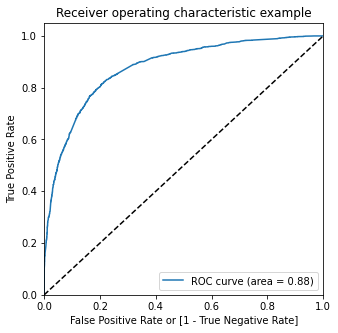

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_score)

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Lead_score  CustID  predicted  10.0  20.0  30.0  40.0  50.0  \
0          0   12.581064    2179          0     1     0     0     0     0   
1          0   64.612393    3501          1     1     1     1     1     1   
2          0    8.260907    5031          0     0     0     0     0     0   
3          0   21.198636    3457          0     1     1     0     0     0   
4          0   13.157801    7418          0     1     0     0     0     0   

   60.0  70.0  80.0  90.0  
0     0     0     0     0  
1     1     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0

In [101]:
# Now let's calculate accuracy sensitivity and specificity and precision for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

      prob  accuracy     sensi     speci     preci
10.0  10.0  0.584805  0.970797  0.350393  0.475772
20.0  20.0  0.728878  0.914476  0.616164  0.591314
30.0  30.0  0.793821  0.833125  0.769952  0.687435
40.0  40.0  0.810214  0.763872  0.838358  0.741596
50.0  50.0  0.809584  0.693367  0.880162  0.778454
60.0  60.0  0.793979  0.577388  0.925513  0.824791
70.0  70.0  0.779319  0.494785  0.952116  0.862545
80.0  80.0  0.753783  0.395912  0.971117  0.892756
90.0  90.0  0.709805  0.249479  0.989359  0.934375


 **So, 60 is the optimum lead score at which lead conversion rate is more than 80%.(Precision)**

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_score.map( lambda x: 1 if x > 60.00 else 0)

y_train_pred_final.head()

Converted  Lead_score  CustID  predicted  10.0  20.0  30.0  40.0  50.0  \
0          0   12.581064    2179          0     1     0     0     0     0   
1          0   64.612393    3501          1     1     1     1     1     1   
2          0    8.260907    5031          0     0     0     0     0     0   
3          0   21.198636    3457          0     1     1     0     0     0   
4          0   13.157801    7418          0     1     0     0     0     0   

   60.0  70.0  80.0  90.0  final_predicted  
0     0     0     0     0                0  
1     1     0     0     0                1  
2     0     0     0     0                0  
3     0     0     0     0                0  
4     0     0     0     0                0

In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939785624211854

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3653,  294],
       [1013, 1384]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5773884021693784

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.9255130478844692

In [108]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07448695211553079


In [109]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8247914183551848


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7828975567938277


**So for final model at lead score 60 overall accuracy is 79.39% and lead conversion rate is 82.47%.**

### Making predictions on test data

In [111]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5114             0                    -0.673433                          0   
689              0                    -0.534912                          0   
4087             0                     0.898326                          0   
740              0                    -0.625412                          0   
5224             0                    -0.464727                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
5114                       0                             0   
689                        0                             0   
4087                       0                             0   
740                        0                             0   
5224                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
5114                                0                            0   
689                                 0                            0   
4087                                0                            0   
740                                 0                            0   
5224                                1                            0   

      Last Activity_Olark Chat Conversation  \
5114                                      0   
689                                       0   
4087                                      0   
740                                       0   
5224                                      0   

      Last Activity_Page Visited on Website  Last Activity_Unreachable  \
5114                                      0                          0   
689                                       1                          0   
4087                                      0                          0   
740                                       0                          0   
5224                                      0                          0   

      Specialization_Rural and Agribusiness  \
5114                                      0   
689                                       0   
4087                                      0   
740                                       0   
5224                                      0   

      What is your current occupation_Working Professional  \
5114                                                  0      
689                                                   0      
4087                                                  0      
740                                                   0      
5224                                                  0      

      Last Notable Activity_Email Opened  \
5114                                   0   
689                                    0   
4087                                   1   
740                                    1   
5224                                   0   

      Last Notable Activity_Had a Phone Conversation  \
5114                                               0   
689                                                0   
4087                                               0   
740                                                0   
5224                                               0   

      Last Notable Activity_Modified  \
5114                               0   
689                                1   
4087                               0   
740                                0   
5224                               1   

      Last Notable Activity_Olark Chat Conversation  \
5114                                              0   
689                                               0   
4087                                              0   
740                                               0   
5224                                              0   

      Last Notable Activity_Page Visited on Website  \
5114                                              0   
689                                               0   
4087                

In [112]:
X_test_sm = sm.add_constant(X_test)

In [113]:
y_test_pred = res.predict(X_test_sm)

In [114]:
y_test_pred[:10]

5114    0.320393
689     0.067467
4087    0.450724
740     0.130640
5224    0.048298
5387    0.804513
7612    0.200646
5287    0.147887
2258    0.540558
8684    0.572540
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [116]:
# Let's see the head
y_pred_1.head()

0
5114  0.320393
689   0.067467
4087  0.450724
740   0.130640
5224  0.048298

In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [118]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  CustID         0
0          0    5114  0.320393
1          1     689  0.067467
2          1    4087  0.450724
3          0     740  0.130640
4          0    5224  0.048298

In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_score'})

In [126]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Lead_score'], axis=1)

In [127]:
y_pred_final['Lead_score']=y_pred_final['Lead_score']*100
y_pred_final.head()

CustID  Converted  Lead_score
0    5114          0   32.039332
1     689          1    6.746730
2    4087          1   45.072370
3     740          0   13.064039
4    5224          0    4.829789

In [128]:
y_pred_final['final_predicted'] = y_pred_final.Lead_score.map(lambda x: 1 if x > 60.00 else 0)
y_pred_final.head()

CustID  Converted  Lead_score  final_predicted
0    5114          0   32.039332                0
1     689          1    6.746730                0
2    4087          1   45.072370                0
3     740          0   13.064039                0
4    5224          0    4.829789                0

In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7955882352941176

In [130]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1539,  131],
       [ 425,  625]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5952380952380952

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.921556886227545

In [134]:
#precision
TP/float(TP+FP)

0.8267195767195767

# Test data has an accuracy of 80% and lead conversion rate is 83%